In [1]:
%%capture
pip install pandas numpy wordcloud matplotlib nltk

In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import ssl
import requests
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
#Use pd.read_json("../Sarcasm_Headlines_Dataset_v2.json",lines=True) if not in colab
data = pd.read_json("../Sarcasm_Headlines_Dataset_v2.json",lines=True)
len(''.join(list(data.query("is_sarcastic==1")['headline'])))

890723

In [4]:
nltk.download('stopwords')
stwrds = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnbillos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# method to clean a given headline by lowercasing the string, removing spaces, and removing stopwords
def clean_headlines(headline):
    headline = headline.lower()
    headline_split = headline.split()
    cleaned_headline = []
    for word in headline_split:
        if word not in stwrds:
            cleaned_headline.append(word)
    
    cleaned_line = " ".join(cleaned_headline)
    return cleaned_line

In [6]:
# applies function to all entries
data['headline'] = data['headline'].apply(clean_headlines)

In [7]:
data

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails congress falling short ...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar getting work,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close using word 'streamin...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews celebrate rosh hashasha something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,beautiful acceptance speech week came queer ko...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed orbiting spielberg-gates ...,https://www.theonion.com/mars-probe-destroyed-...


In [8]:
sarcastic_str = ''.join(list(data.query("is_sarcastic==1")['headline']))
non_sarcastic_str = ''.join(list(data.query("is_sarcastic==0")['headline']))


(-0.5, 399.5, 199.5, -0.5)

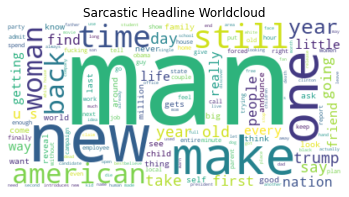

In [9]:
sarcastic_wordcloud = WordCloud(max_font_size=150, max_words=150, background_color="white").generate(sarcastic_str)
plt.imshow(sarcastic_wordcloud, interpolation='bilinear')
plt.title("Sarcastic Headline Worldcloud")
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

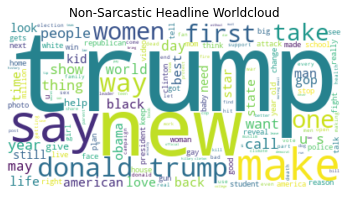

In [10]:
non_sarcastic_wordcloud = WordCloud(max_font_size=150, max_words=150, background_color="white").generate(non_sarcastic_str)
plt.imshow(non_sarcastic_wordcloud, interpolation='bilinear')
plt.title("Non-Sarcastic Headline Worldcloud")
plt.axis("off")